# MSA 2023 Phase 2 - Part 1 - Regression

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [3]:
# Load dataset
exam_scores = pd.read_csv("../0. Resources/datasets/exam_scores.csv")
exam_scores.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [4]:
# Drop first column
exam_scores.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
# Get column types and count of non-null values in each column
exam_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [6]:
# Summary statistics of numerical variables
exam_scores.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


## 2. Visualise data

In [7]:
def plot_boxplot_and_countplot(data, x, y="MathScore"):
    fig, (ax1, ax2) = plt.subplots(ncols=2)

    sns.boxplot(data, x=x, y=y, ax=ax1)
    sns.countplot(data=exam_scores, x=x, ax=ax2)

    fig.set_size_inches(12, 5)

### Gender

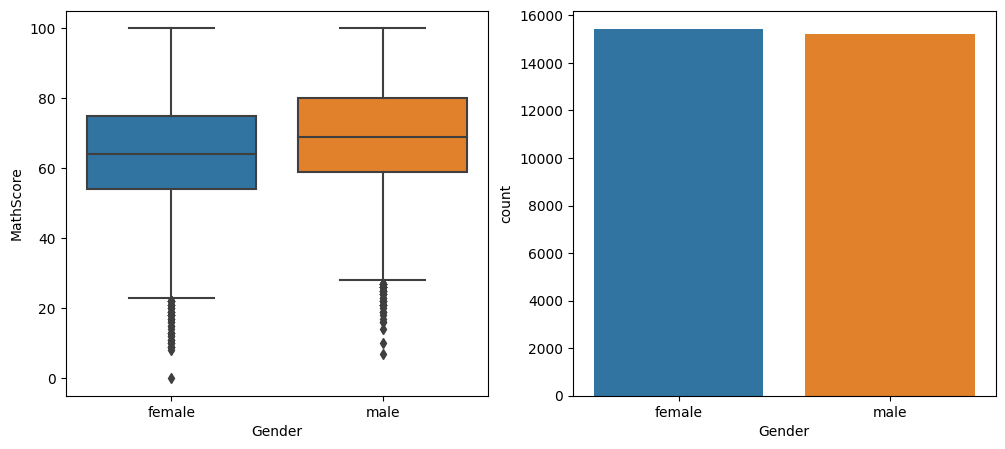

In [8]:
plot_boxplot_and_countplot(exam_scores, "Gender")

Male students appear to have a higher math score on average than female students. Both genders are balanced.

### Ethnic Group

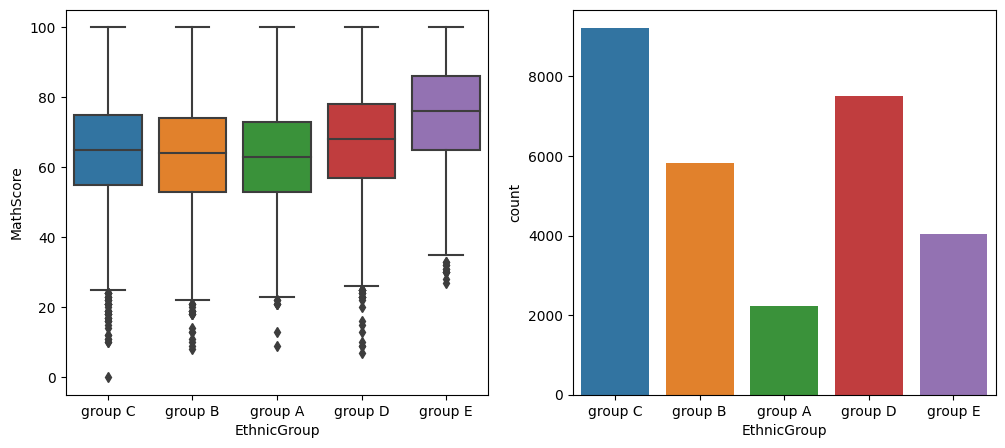

In [9]:
plot_boxplot_and_countplot(exam_scores, "EthnicGroup")

Group E appears to have a higher math score on average than other ethnic groups. There is some imbalance between ethnic groups.

### Parent Education

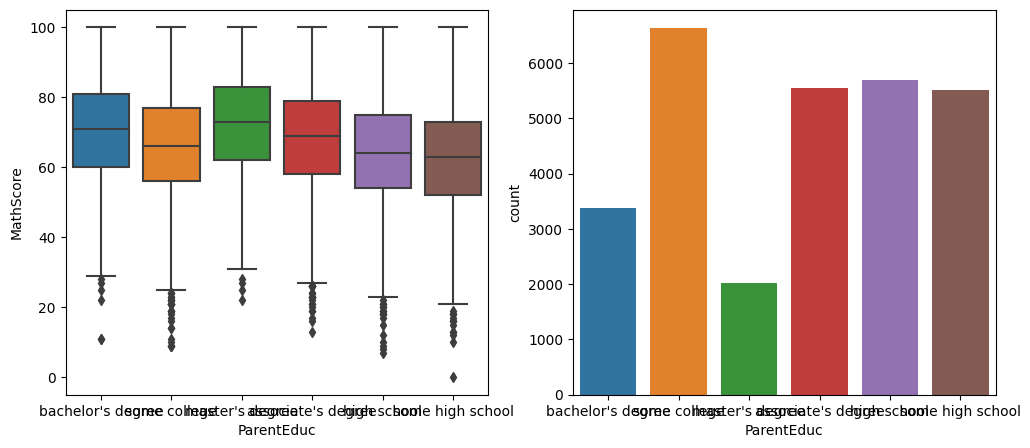

In [10]:
plot_boxplot_and_countplot(exam_scores, "ParentEduc")

The parent's education appears to have an effect on the student's math score.

### Lunch Type

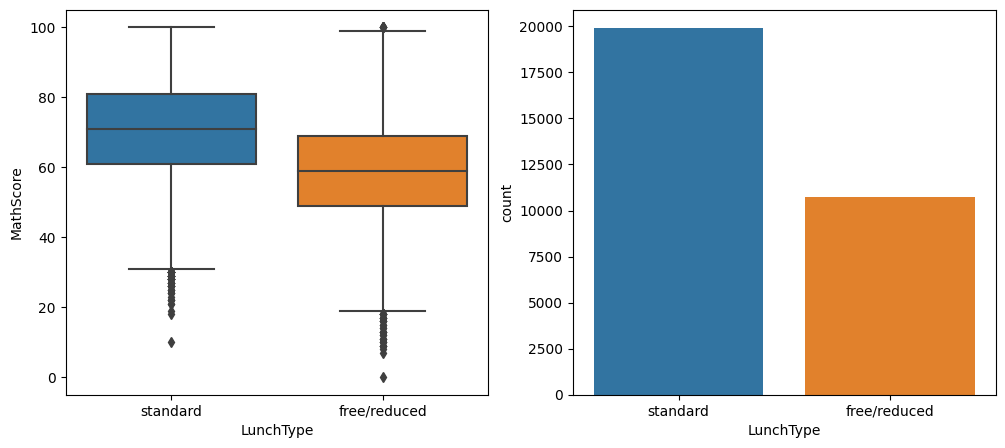

In [11]:
plot_boxplot_and_countplot(exam_scores, "LunchType")

Students with standard lunches appear to have higher math scores on average than those with free/reduced lunches.

### Test Prep

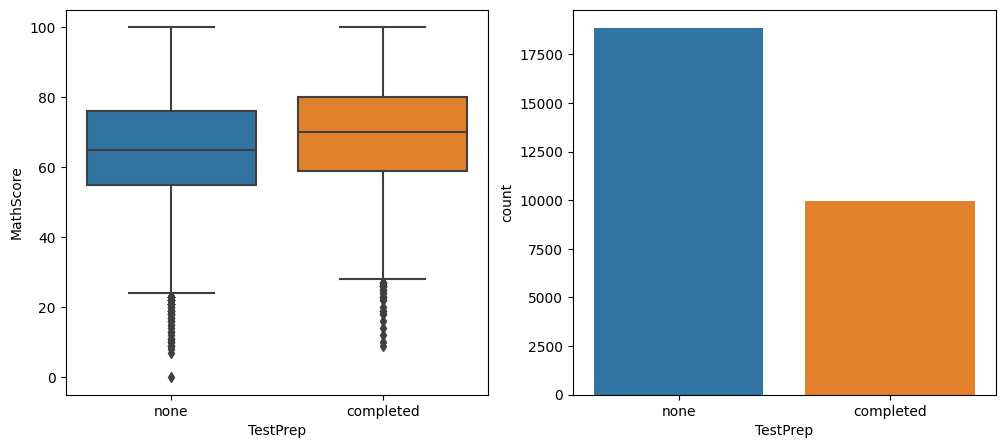

In [12]:
plot_boxplot_and_countplot(exam_scores, "TestPrep")

Students who have completed test prepration appear to have higher math scores on average than those who haven't.

### Parent Marital Status

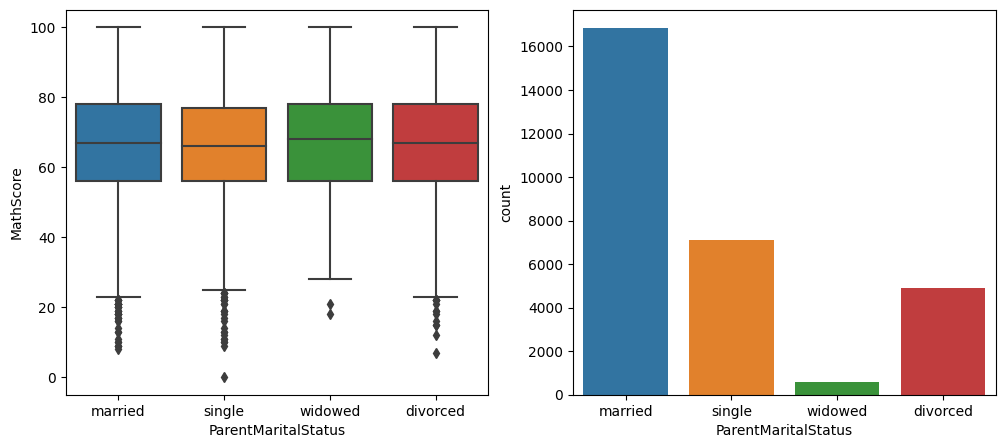

In [13]:
plot_boxplot_and_countplot(exam_scores, "ParentMaritalStatus")

The parent's marital status appears to have no significant effect on the student's math score. Therefore, we drop this feature.

### Practice Sport

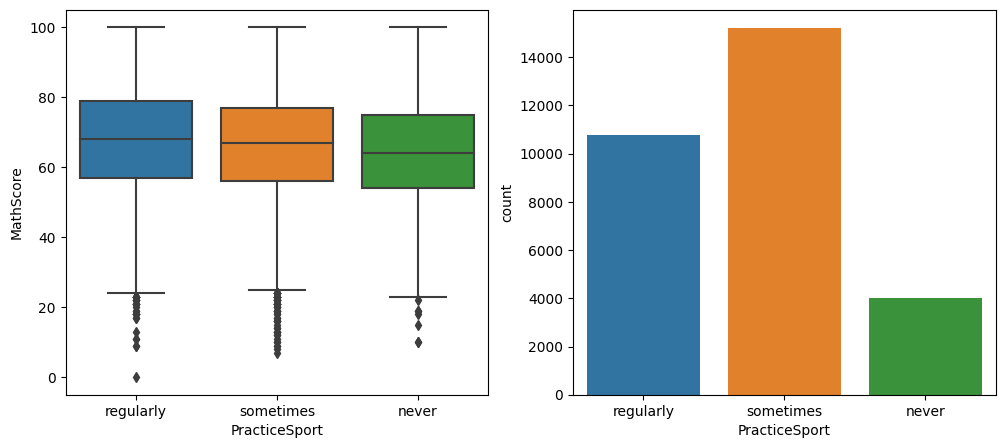

In [14]:
plot_boxplot_and_countplot(exam_scores, "PracticeSport")

Whether the student practises sport appears to have little effect on their math score. Therefore, we drop this feature.

### Number of Siblings

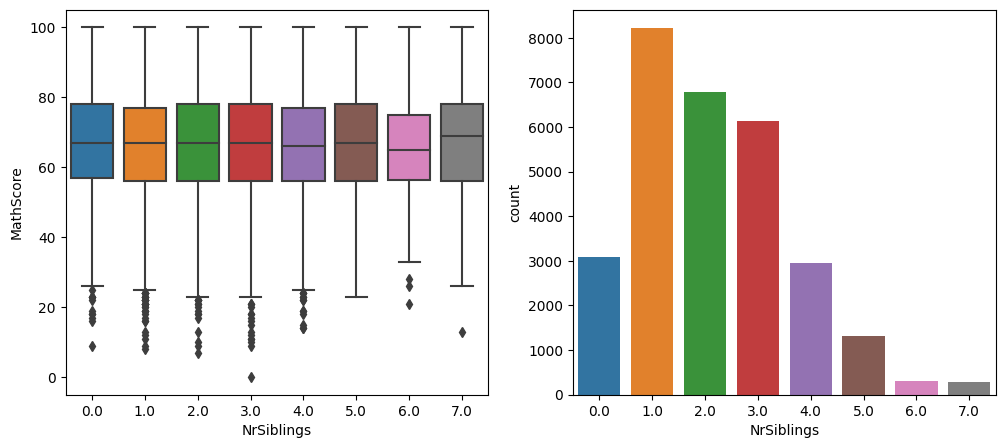

In [15]:
plot_boxplot_and_countplot(exam_scores, "NrSiblings")

The number of siblings a student has appears to have no effect on their math score. Therefore, we drop this feature.

### Is First Child

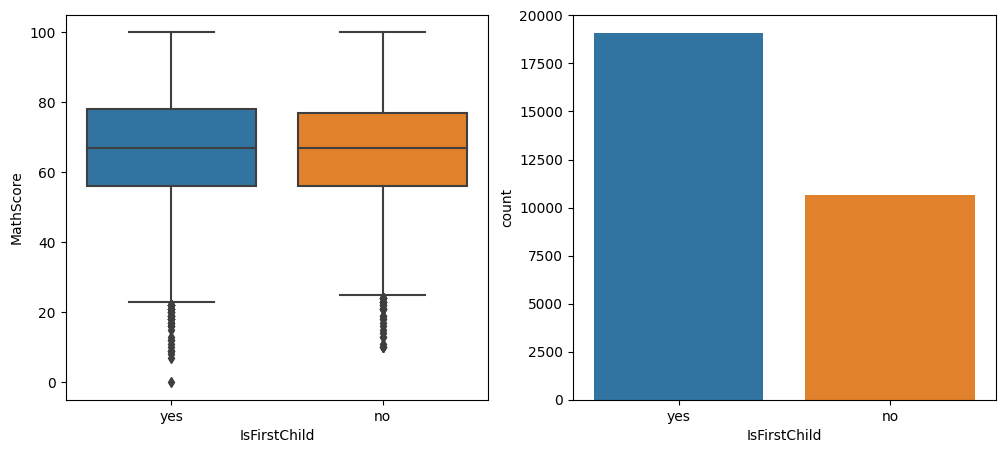

In [16]:
plot_boxplot_and_countplot(exam_scores, "IsFirstChild")

Whether the student is a first child appears to have no effect on their math score. Therefore, we drop this feature.

### Weekly Study Hours

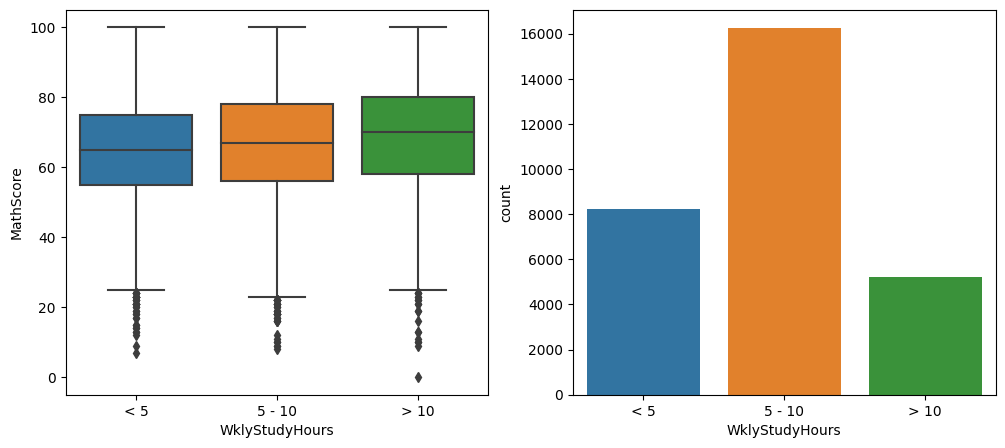

In [17]:
plot_boxplot_and_countplot(exam_scores, "WklyStudyHours")

Students who study more per week tend to have higher math scores on average.

### Transport Means

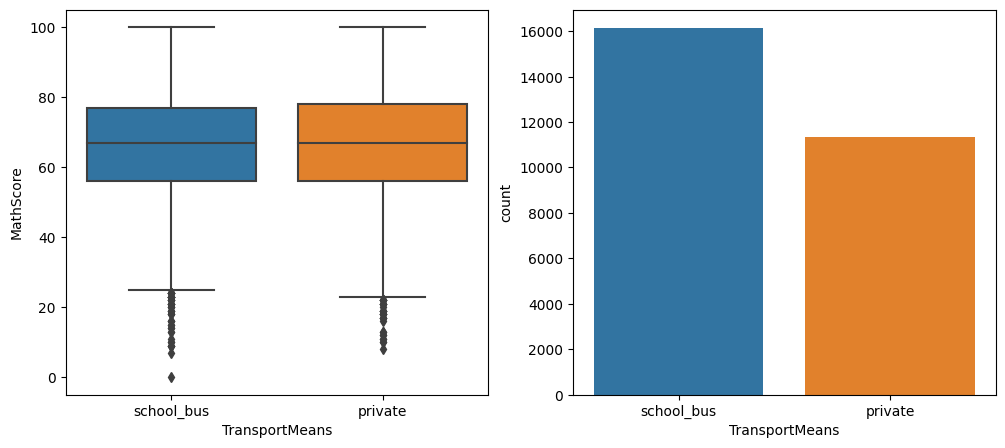

In [18]:
plot_boxplot_and_countplot(exam_scores, "TransportMeans")

The student's transport means appears to have no effect on their math score. Therefore, we drop this feature.

## 3. Clean data

In [19]:
# Drop unnecessary columns
exam_scores.drop(columns=["ParentMaritalStatus", "NrSiblings", "IsFirstChild", "PracticeSport", "TransportMeans"], inplace=True)

In [20]:
# Remove rows with null values
exam_scores.dropna(subset=["WklyStudyHours", "TestPrep"], inplace=True)

In [21]:
# Convert columns with two categories into binary numeric values
exam_scores = pd.get_dummies(exam_scores, columns=["LunchType", "TestPrep", "Gender"], drop_first=True, dtype=int)

In [22]:
# Convert columns with ordered categories into numeric values
exam_scores.WklyStudyHours.replace(["< 5", "5 - 10", "> 10"], [0, 1, 2], inplace=True)

In [23]:
# Convert columns with 3+ categories into numerical values with one-hot encoding
exam_scores = pd.get_dummies(exam_scores, columns=["ParentEduc", "EthnicGroup"], dtype=int)

In [24]:
exam_scores.head()

,WklyStudyHours,MathScore,ReadingScore,WritingScore,LunchType_standard,TestPrep_none,Gender_male,ParentEduc_associate's degree,ParentEduc_bachelor's degree,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E
0,0,71,71,74,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,87,93,91,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,45,56,42,0,1,1,1,0,0,0,0,0,1,0,0,0,0
4,1,76,78,75,1,1,1,0,0,0,0,1,0,0,0,1,0,0
5,1,73,84,79,1,1,0,1,0,0,0,0,0,0,1,0,0,0


## 4. Identify correlated variables

<Axes: >

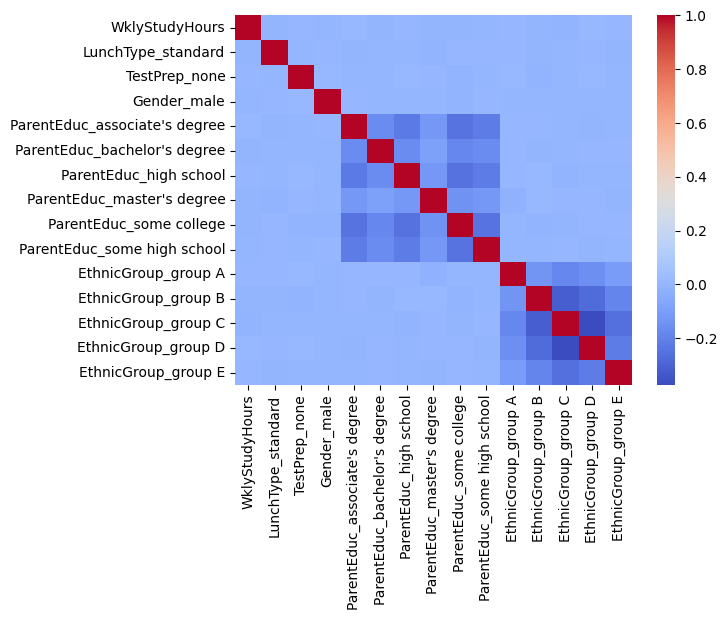

In [25]:
# Compute the correlation matrix
correlation = exam_scores.drop(columns=["MathScore", "ReadingScore", "WritingScore"]).corr()

# Display the correlation on a heatmap
sns.heatmap(correlation, cmap='coolwarm')

There appears to be relatively low correlation between variables. Parent education terms and ethnic group terms have comparatively greater correlation but not to a problematic degree.

In [26]:
# Save processed dataset
exam_scores.to_csv("preprocessed_datasets/exam_scores.csv", index=False)

## 5. Summary

We are aiming to predict the math score of a student, using data of exam scores of public students and a variety of personal and socio-economic factors.

For the exploratory data analysis, I inspected the columns of the dataset, their datatypes and the number of null values. I also created numerical summaries of the data.

For each potential explanatory variable, I produced grouped boxplots to analyse the effect of the variable on the math score. I dropped insignificant variables from the dataset.

To deal with missing values for categorical variables, I dropped the rows with missing values as there was no effective way to fill in the missing data. I applied ordinal encoding for the Weekly Study Hours category as the categories are ordered. I converted the other categorical variables into numeric variables via one-hot-encoding.

Finally, I visualised the correlation matrix between explanatory variables and found no significantly correlated terms.